In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
!git clone https://github.com/TannerGilbert/Tutorials.git

fatal: destination path 'Tutorials' already exists and is not an empty directory.


In [19]:
dataset = pd.read_csv('ratings.csv')
dataset

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


In [20]:
dataset.shape

(981756, 3)

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [22]:
train.head()

,book_id,user_id,rating
341848,3423,4608,2
964349,9811,36373,5
645459,6485,2957,4
74960,750,42400,3
358670,3591,36886,5


In [23]:
test.head()

,book_id,user_id,rating
646451,6495,19643,5
614851,6175,8563,4
974393,9920,52110,3
21471,215,33864,5
272540,2728,16587,3


In [24]:
n_users = len(dataset.user_id.unique())
n_users

53424

In [25]:
n_books = len(dataset.book_id.unique())
n_books

10000

In [26]:
# creating dot product 
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path 
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

Train on 785404 samples
Epoch 1/5
785404/785404 [==============================] - 78s 100us/sample - loss: 13.7462
Epoch 2/5
785404/785404 [==============================] - 85s 108us/sample - loss: 4.5713
Epoch 3/5
785404/785404 [==============================] - 78s 100us/sample - loss: 1.7521
Epoch 4/5
785404/785404 [==============================] - 78s 99us/sample - loss: 1.1716
Epoch 5/5
785404/785404 [==============================] - 80s 101us/sample - loss: 0.9504


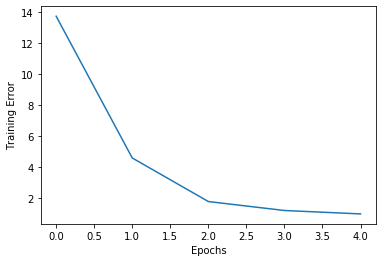

In [27]:
from tensorflow.keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [28]:
model.evaluate([test.user_id, test.book_id], test.rating)

196352/196352 [==============================] - 6s 29us/sample - loss: 1.1502


1.1501772494153684

In [31]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])
[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[5.153709] 5
[3.792516] 4
[3.4155014] 3
[4.4259515] 5
[3.3773181] 3
[4.254762] 3
[4.094265] 3
[4.8559017] 4
[4.1187077] 3
[3.4991958] 5


[None, None, None, None, None, None, None, None, None, None]

In [32]:
# neural network 
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it 
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')


Train on 785404 samples
Epoch 1/5
785404/785404 [==============================] - 85s 108us/sample - loss: 0.7989
Epoch 2/5
785404/785404 [==============================] - 88s 112us/sample - loss: 0.6874
Epoch 3/5
785404/785404 [==============================] - 91s 116us/sample - loss: 0.6573
Epoch 4/5
785404/785404 [==============================] - 89s 114us/sample - loss: 0.6346
Epoch 5/5
785404/785404 [==============================] - 85s 109us/sample - loss: 0.6156


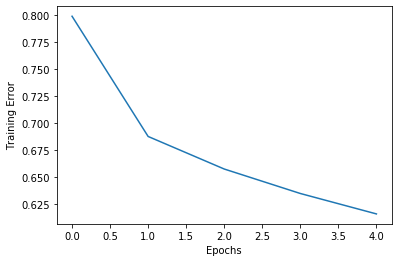

In [33]:
from tensorflow.keras.models import load_model 

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model.h5')
else:
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [35]:
# Extract embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [36]:
book_em_weights[:5]

array([[-0.04368162,  0.00468575, -0.02166003,  0.01682066, -0.02549621],
       [ 0.72050965, -1.2806975 ,  1.2883252 , -1.2631444 , -1.1178986 ],
       [ 1.0801425 , -1.1050383 ,  1.2539973 , -1.2386044 , -1.0860262 ],
       [ 0.54966384, -0.89679223,  0.8882169 , -0.9325445 , -0.71541256],
       [ 1.1028547 , -1.260202  ,  1.2503121 , -1.3722765 , -1.1257783 ]],
      dtype=float32)

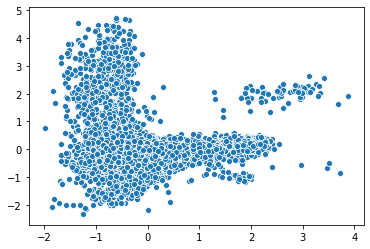

In [37]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])

In [38]:
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis=1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

0.9999999

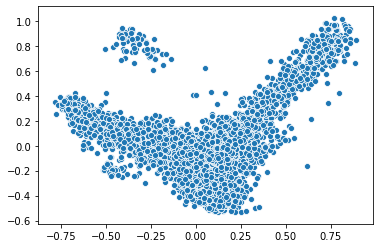

In [39]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])

In [40]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.019s...
[t-SNE] Computed neighbors for 10001 samples in 0.513s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.029083
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.817772
[t-SNE] KL

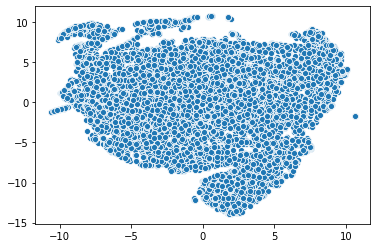

In [41]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

In [46]:
# creating dataset for making recommendations
book_data = np.array(list(set(dataset.book_id)))
book_data[:5]

array([1, 2, 3, 4, 5])

In [47]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [50]:
predictions = model.predict([user, book_data])
predictions = np.array([a[0] for a in predictions])
recommended_book_ids = (-predictions).argsort()[:5]
recommended_book_ids

array([7638, 7660, 8232, 8853, 8340])

In [51]:


books = pd.read_csv('books.csv')
books.head()


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [52]:
books[books['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
7637,7638,12009,12009,2465248,28,1597800449,9.781598e+12,Iain M. Banks,2004.0,The Algebraist,...,13210,14793,606,185,684,3067,5984,4873,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
7659,7660,21330,21330,2910,15,1401204864,9.781401e+12,"Bill Willingham, Mark Buckingham, Steve Leialo...",2005.0,"Fables, Volume 5: The Mean Seasons",...,17909,18221,545,120,340,2889,7435,7437,https://images.gr-assets.com/books/1327870458m...,https://images.gr-assets.com/books/1327870458s...
8231,8232,10395,10395,13106,31,60731427,9.780061e+12,Franklin Foer,2004.0,How Soccer Explains the World: An Unlikely The...,...,9231,9944,716,246,669,2794,3715,2520,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8339,8340,41958,41958,41459,78,752865366,9.780753e+12,Maeve Binchy,2004.0,Nights of Rain and Stars,...,12365,14137,1015,282,1158,4544,5117,3036,https://images.gr-assets.com/books/1355496059m...,https://images.gr-assets.com/books/1355496059s...
8852,8853,168569,168569,1520707,35,425157539,9.780425e+12,John Sandford,1996.0,Sudden Prey,...,12408,13797,363,46,209,2298,6279,4965,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
